In [1]:
%load_ext autoreload
%autoreload 2

## Mandatory Imports

In [2]:
from utils import DataSeries, H, plot_multiple

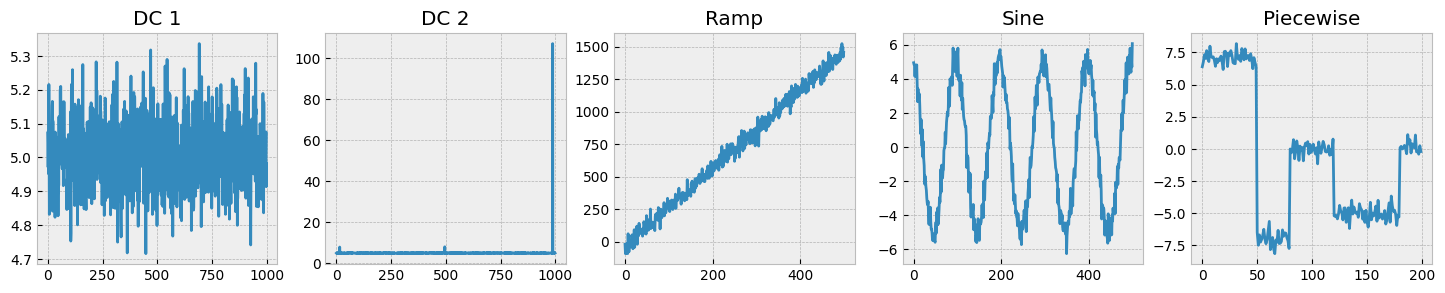

In [3]:
datadict = {
    'DC 1': 'data/DC_noise1.xlsx', 
    'DC 2': 'data/DC_noise2.xlsx',
    'Ramp': 'data/ramp_noise.xlsx',
    'Sine': 'data/sinusoid_noise.xlsx',
    'Piecewise': 'data/noisy_signal.xlsx',
}

data_series = [DataSeries(path) for path in datadict.values()]

plot_multiple(data_series, datadict.keys())

**Cleaning** 
- Global Outliers outside 3sig and
- Local Outliers outside 2sig are removed.


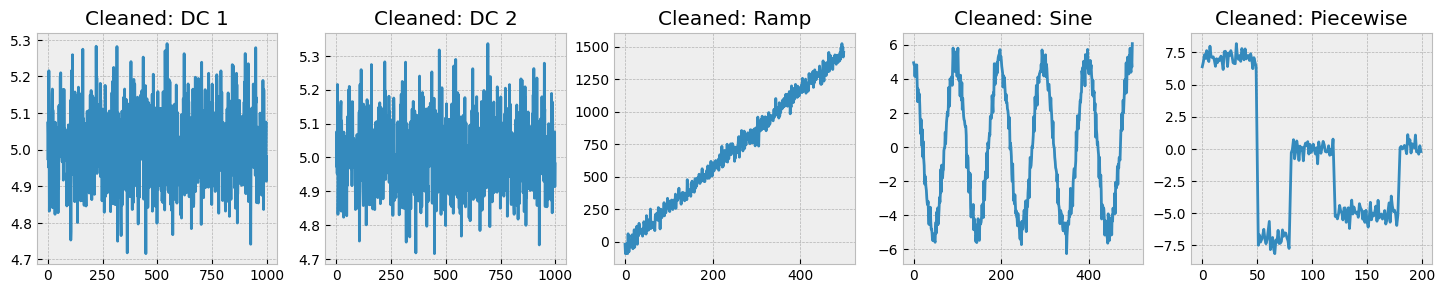

In [4]:
cleaned = [ds.copy().remove_outliers(3, 4, 0.1) for ds in data_series]
plot_multiple(cleaned, ['Cleaned: ' + title for title in datadict.keys()])

**Scaling**
- Amplitude: Standard Scaling
- Index: MinMax Scaling

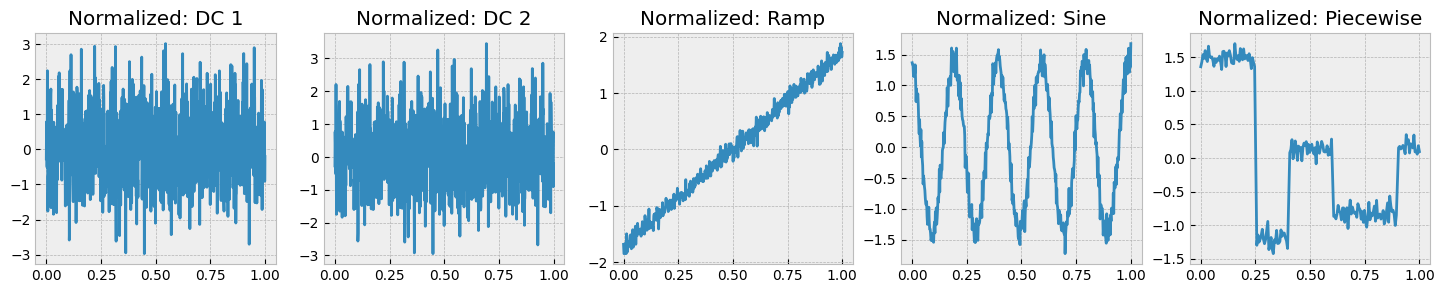

In [5]:
normalized = [ds.copy().normalize() for ds in cleaned]
plot_multiple(normalized, ['Normalized: ' + title for title in datadict.keys()])

## Least Squares

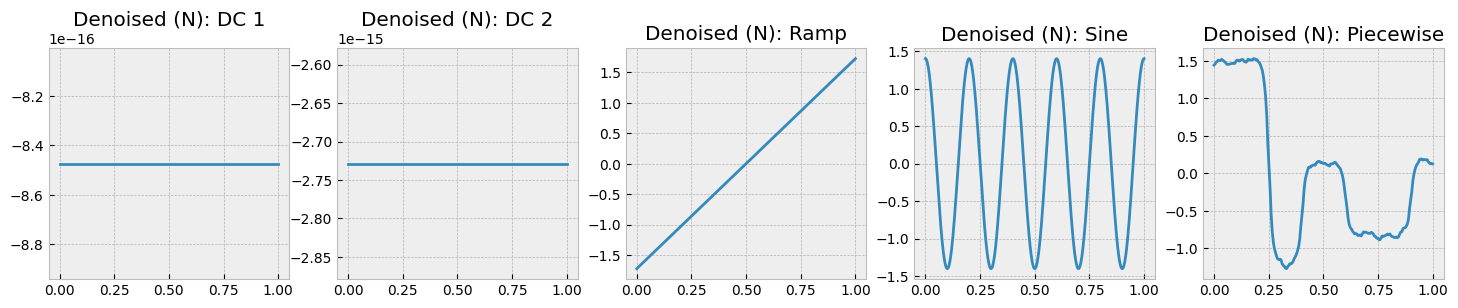

In [6]:
l_kwargs = [{}, {} , {}, {'f': 5}, {'lambda_reg': 5}]

ls_denoised, ls_params = zip(*[ds.denoise_ls(H(ds, kind, **kwargs)) for ds, kind, kwargs in zip(normalized, datadict.values(), l_kwargs)])
plot_multiple(ls_denoised, ['Denoised (N): ' + title for title in datadict.keys()])

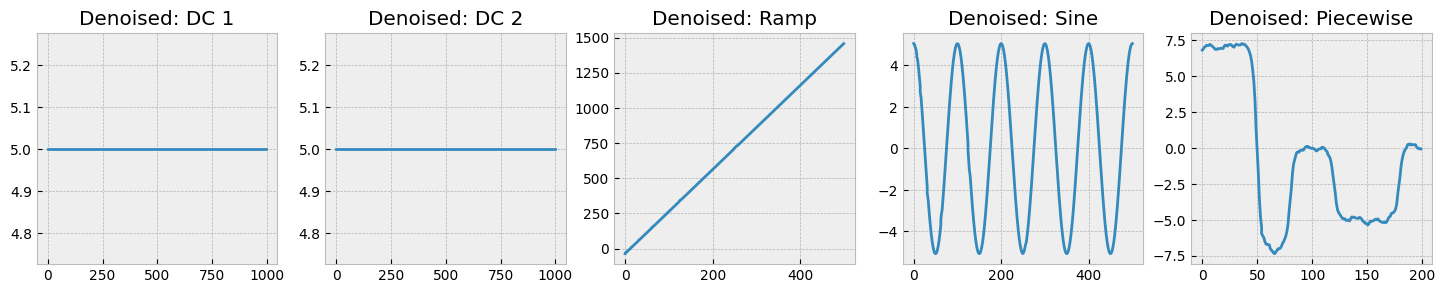

In [7]:
ls_denoised = [ds.denormalize() for ds in ls_denoised]
plot_multiple(ls_denoised, ['Denoised: ' + title for title in datadict.keys()])

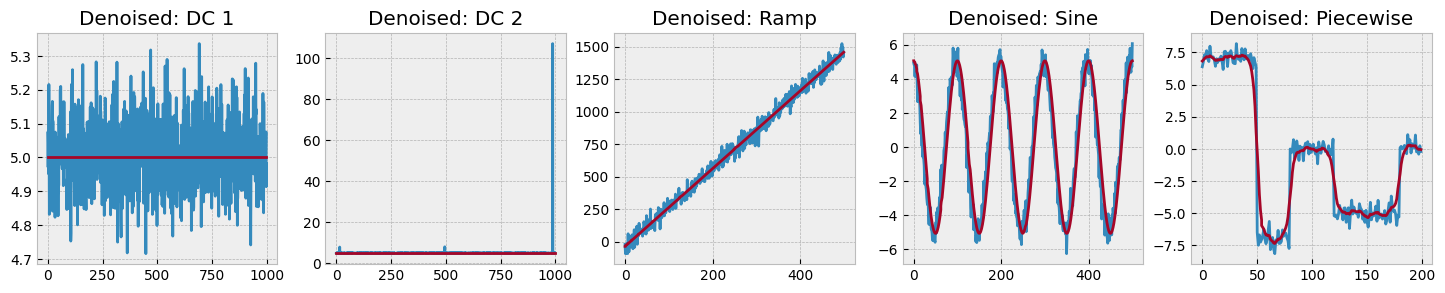

In [8]:
plot_multiple(zip(data_series, ls_denoised), ['Denoised: ' + title for title in datadict.keys()])

## Gradient Descent

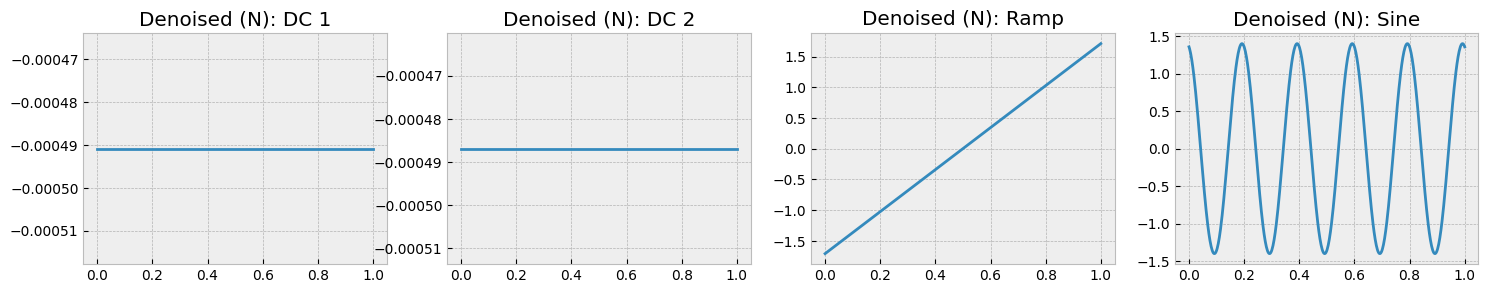

In [9]:
normalized = normalized[:-1]
cleaned = cleaned[:-1]
datadict = {k: v for k, v in datadict.items() if k != 'Piecewise'}
l_kwargs = [{}, {} , {}, {'f': 5}]

gd_denoised, gd_params = zip(*[ds.denoise_gd(H(ds, kind, **kwargs)) for ds, kind, kwargs in zip(normalized, datadict.values(), l_kwargs)])
plot_multiple(gd_denoised, ['Denoised (N): ' + title for title in datadict.keys()])

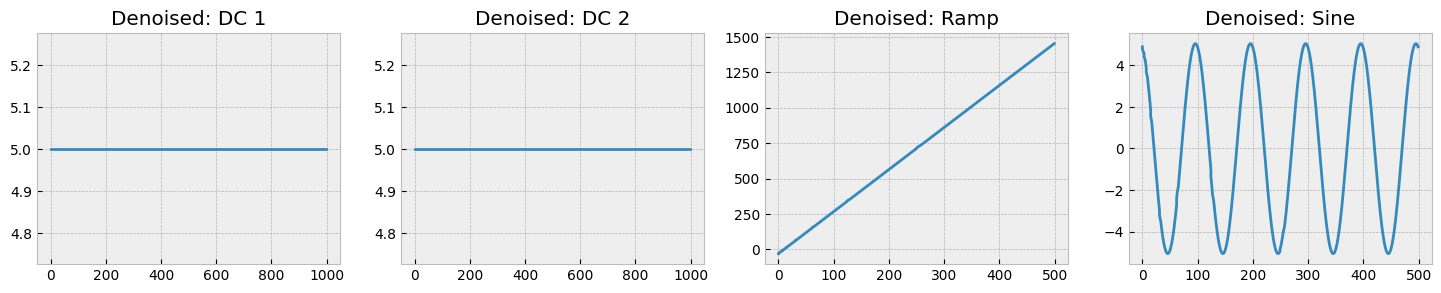

In [10]:
gd_denoised = [ds.denormalize() for ds in gd_denoised]
plot_multiple(gd_denoised, ['Denoised: ' + title for title in datadict.keys()])

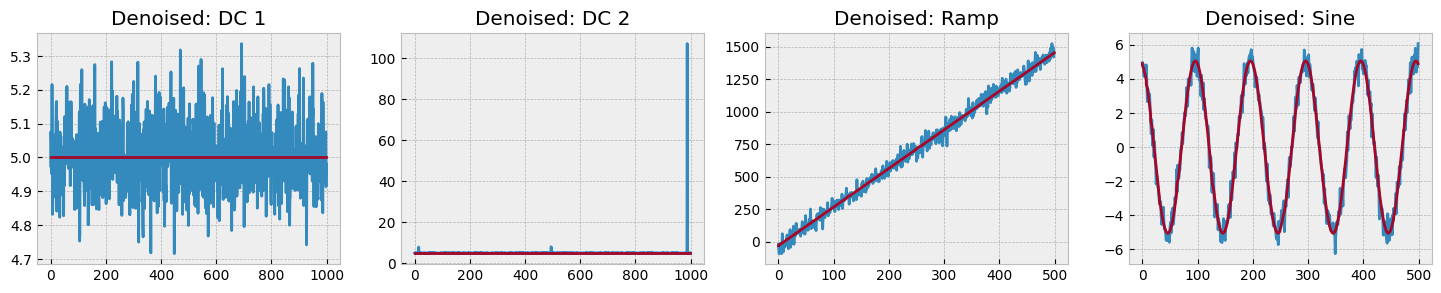

In [11]:
plot_multiple(zip(data_series, gd_denoised), ['Denoised: ' + title for title in datadict.keys()])

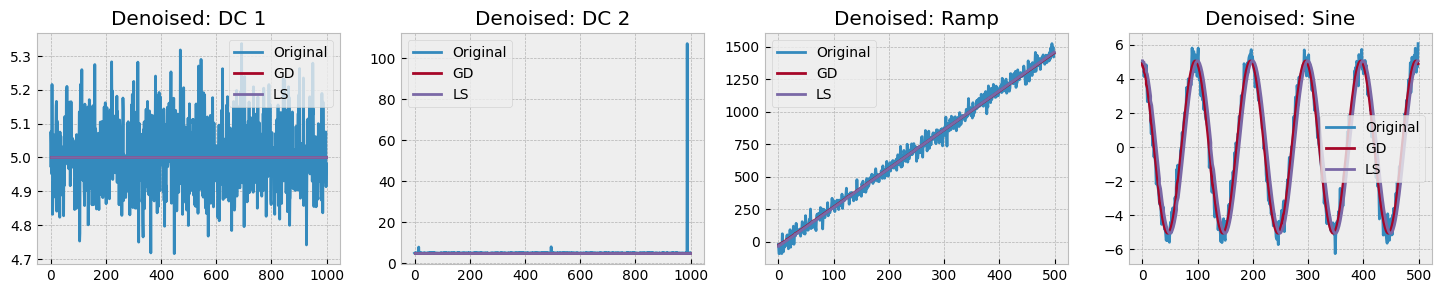

In [12]:
plot_multiple(zip(data_series, gd_denoised, ls_denoised), ['Denoised: ' + title for title in datadict.keys()], ['Original', 'GD', 'LS'])

## Subsampled - Least Squares

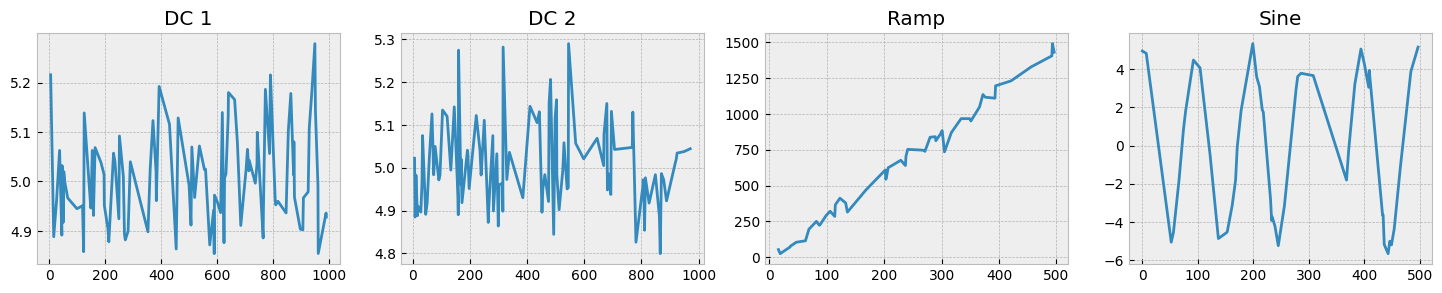

In [13]:
subsample_frac = 0.1
sdata_series = [ds.copy().sample(subsample_frac) for ds in cleaned]

plot_multiple(sdata_series, datadict.keys())

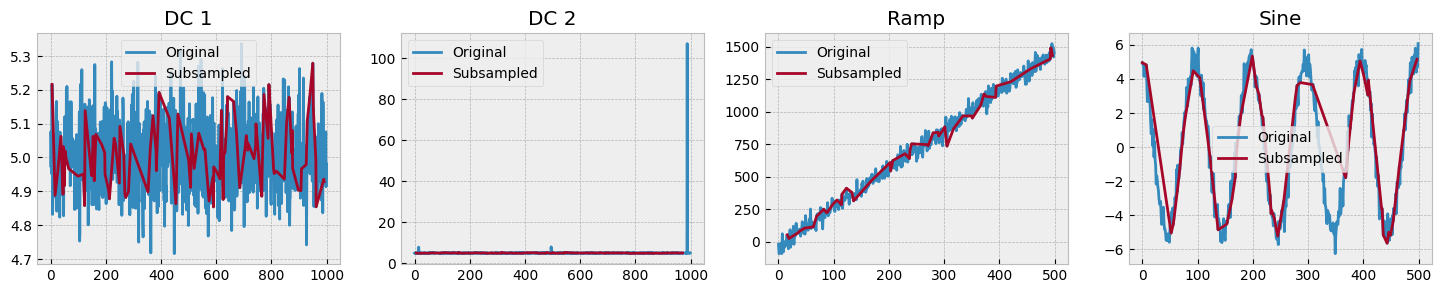

In [14]:
plot_multiple(zip(data_series, sdata_series), datadict.keys(), ['Original', 'Subsampled'])

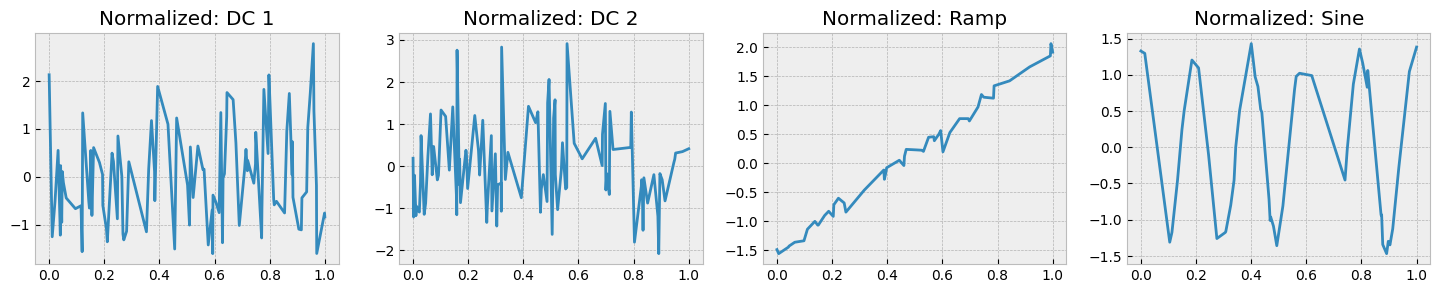

In [15]:
snormalized = [ds.copy().normalize() for ds in sdata_series]
plot_multiple(snormalized, ['Normalized: ' + title for title in datadict.keys()])

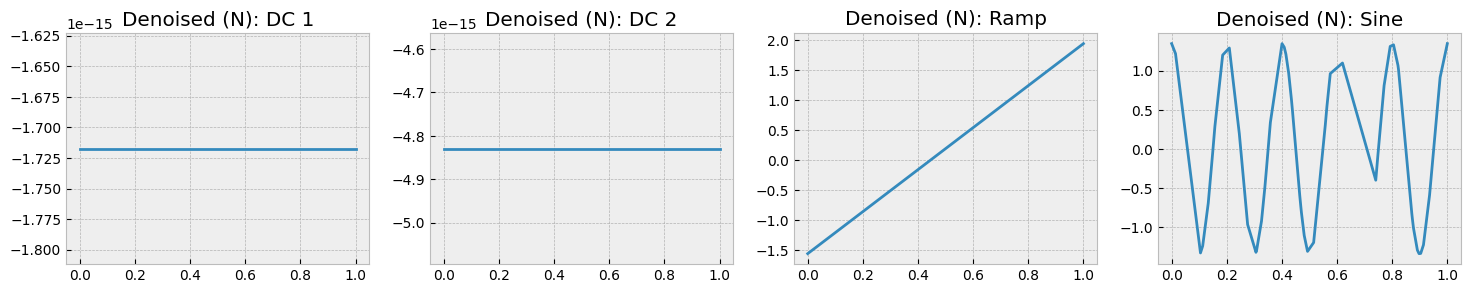

In [16]:
l_kwargs = [{}, {} , {}, {'f': 5}, {'lambda_reg': 5}]

sls_denoised, sls_params = zip(*[ds.denoise_ls(H(ds, kind, **kwargs)) for ds, kind, kwargs in zip(snormalized, datadict.values(), l_kwargs)])
plot_multiple(sls_denoised, ['Denoised (N): ' + title for title in datadict.keys()])

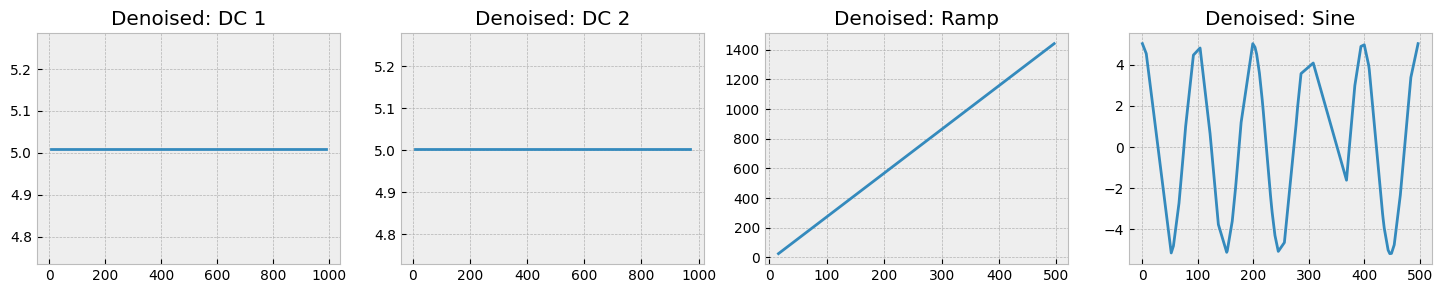

In [17]:
sls_denoised = [ds.denormalize() for ds in sls_denoised]
plot_multiple(sls_denoised, ['Denoised: ' + title for title in datadict.keys()])

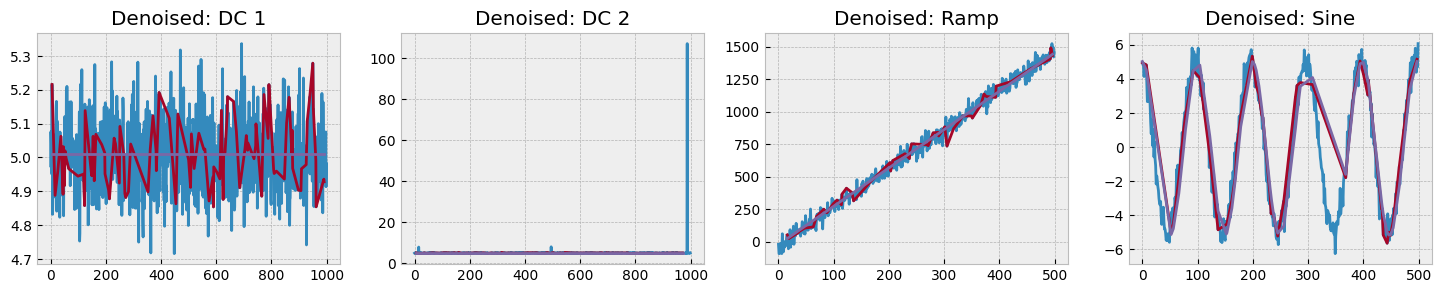

In [18]:
plot_multiple(zip(data_series, sdata_series, sls_denoised), ['Denoised: ' + title for title in datadict.keys()])

## Subsampled - Gradient Descent

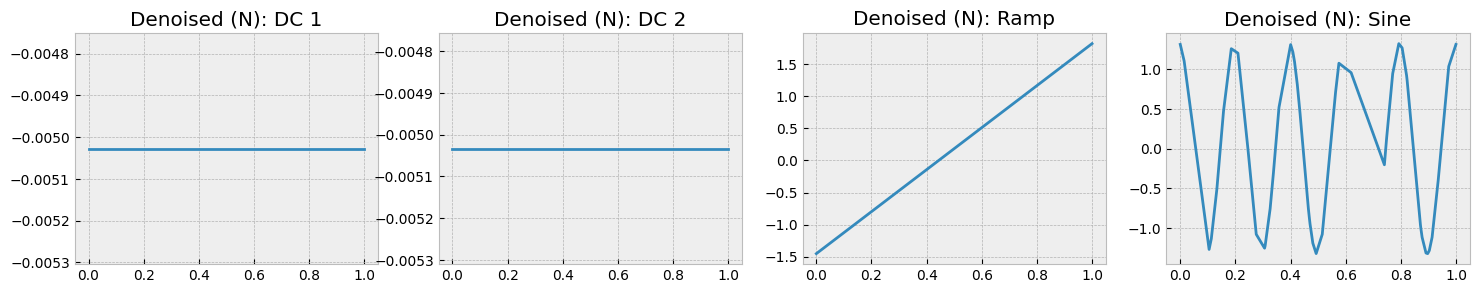

In [19]:
datadict = {k: v for k, v in datadict.items() if k != 'Piecewise'}
l_kwargs = [{}, {} , {}, {'f': 5}]

sgd_denoised, sgd_params = zip(*[ds.denoise_gd(H(ds, kind, **kwargs)) for ds, kind, kwargs in zip(snormalized, datadict.values(), l_kwargs)])
plot_multiple(sgd_denoised, ['Denoised (N): ' + title for title in datadict.keys()])

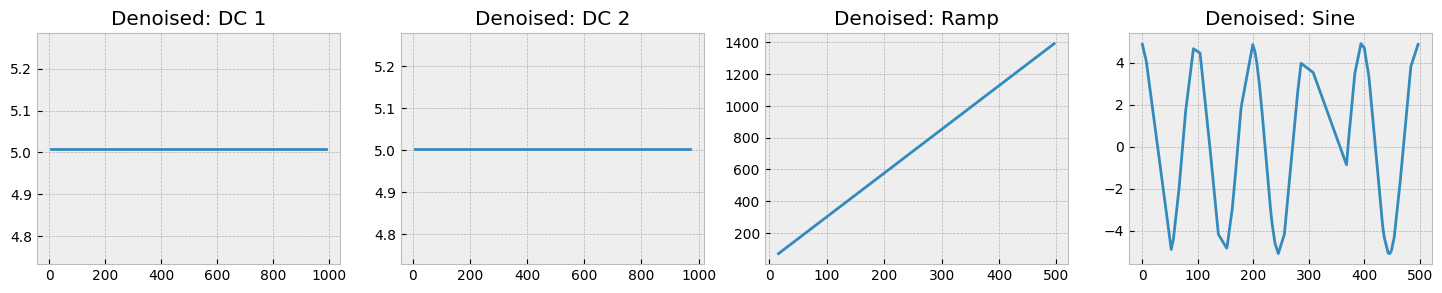

In [20]:
sgd_denoised = [ds.denormalize() for ds in sgd_denoised]
plot_multiple(sgd_denoised, ['Denoised: ' + title for title in datadict.keys()])

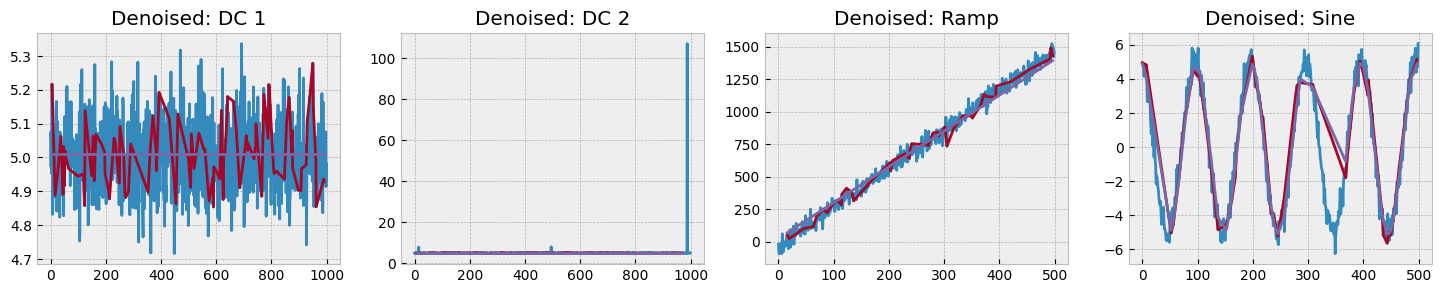

In [21]:
plot_multiple(zip(data_series, sdata_series, sgd_denoised), ['Denoised: ' + title for title in datadict.keys()])

In [22]:
print("Least Squares", ls_params[:-1])
print("Gradient Descent", gd_params)
print("Subsampled Least Squares", sls_params[:-1])
print("Subsampled Gradient Descent", sgd_params)

Least Squares (array([-8.47412418e-16]), array([-2.72872003e-15]), array([ 3.44266285, -1.72133143]), array([1.4001697 , 0.24778762]))
Gradient Descent (array([-0.00049084]), array([-0.00048689]), array([ 3.41910719, -1.7087405 ]), array([ 1.35487814, -0.3432614 ]))
Subsampled Least Squares (array([-1.71737624e-15]), array([-4.82947016e-15]), array([ 3.49998729, -1.56201516]))
Subsampled Gradient Descent (array([-0.00502742]), array([-0.00503351]), array([ 3.26787508, -1.45120946]), array([ 1.31173005, -0.19255825]))


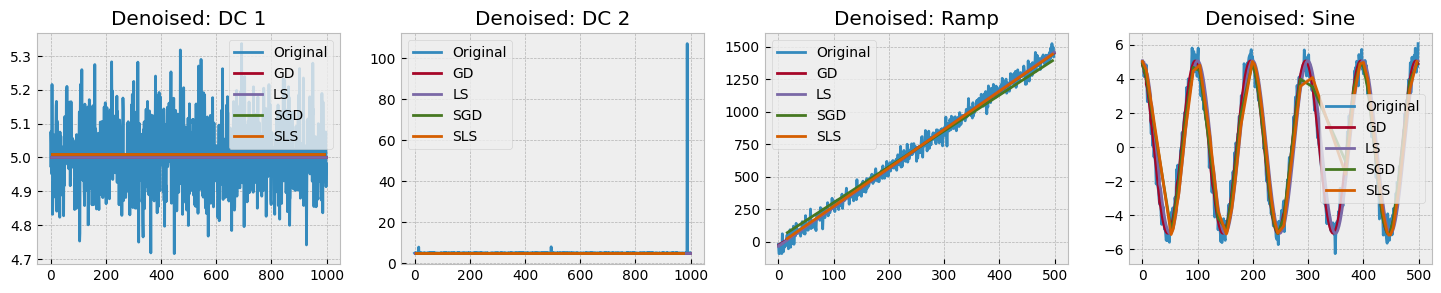

In [23]:
plot_multiple(zip(data_series, gd_denoised, ls_denoised, sgd_denoised, sls_denoised), ['Denoised: ' + title for title in datadict.keys()], ['Original', 'GD', 'LS', 'SGD', 'SLS'])